# <span style="color:green"><ins>Chapitre 2: Vecteurs, matrices et systèmes linéaires</ins></span>

In [1]:
import numpy as np

Dans ce chapitre, nous allons présenter quelques fonctions de la sous-librairie "linalg" de numpy (linear algebra). La liste exhaustive de toutes les fonctions disponibles est présentée sous le lien suivant :
https://numpy.org/doc/stable/reference/routines.linalg.html

## 2.1 Matrices et vecteurs : syntaxe

On supposera toujours que les matrices et vecteurs sont définis comme des tableaux numpy comme suit :<br/>
Pour définir
\begin{equation*}
A=
\left(
\begin{matrix}
1 & 2\\
3 & 4
\end{matrix}
\right)
\end{equation*}
On code :

In [2]:
A=np.array([[1,2],[3,4]])
print(A)

[[1 2]
 [3 4]]


Pour définir
\begin{equation*}
A=
\left(
\begin{matrix}
1\\
2
\end{matrix}
\right)
\end{equation*}
On code :

In [3]:
A=np.array([[1],[2]])
print(A)

[[1]
 [2]]


Pour définir
\begin{equation*}
A=
\left(
\begin{matrix}
1 & 2
\end{matrix}
\right)
\end{equation*}
On code :

In [4]:
A=np.array([[1,2]])
print(A)

[[1 2]]


On notera que les matrices créées ci-dessus sont de type entier, ce qui peut potentiellement causer des problèmes d'overflow. Si le risque existe, il est préférable de travailler avec des *réels* : 

In [5]:
A=np.array([[1.,2.],[3.,4.]])
print(A)

[[1. 2.]
 [3. 4.]]


ou bien 

In [6]:
A=np.array([[1,2],[3,4]],dtype=np.float64)    # floating point number sur 64 bits
print(A)

[[1. 2.]
 [3. 4.]]


## 2.2 Opérations matricielles versus opérations terme à terme

### La règle

Lorsqu'on écrit `A@B`, c'est une multiplication matricielle, les dimensions de $A$ et $B$ doivent donc satisfaire les propriétés matricielles.<br/>
Lorsqu'on écrit `A*B`, `A/B` ou `A**B`, ce sont des opérations terme à terme (l'opérateur s'applique entre les mêmes composantes de $A$ et $B$). $A$ et $B$ doivent donc avoir la même dimension.

### Exemple 1

Soient les matrices suivantes :

In [7]:
A=np.array([[1,2],[3,4]])
print(A)

[[1 2]
 [3 4]]


In [8]:
B=np.array([[5,0],[2,1]])
print(B)

[[5 0]
 [2 1]]


`A@B` va donner la multiplication matricielle, et `A*B` va donner la multiplication terme à terme (élément (i,j) de $A$ multiplié par l'élément (i,j) de $B$) :

In [9]:
print(A@B)

[[ 9  2]
 [23  4]]


In [10]:
print(A*B)

[[5 0]
 [6 4]]


### Exemple 2

Soient les matrices suivantes :

In [11]:
A=np.array([[1,2,3],[4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [12]:
B=np.array([[5],[2],[0]])
print(B)

[[5]
 [2]
 [0]]


`A@B` va donner la multiplication matricielle, et `A*B` va donner **une erreur** car  $A$ et $B$ ne sont pas de même dimension :

In [13]:
print(A@B)

[[ 9]
 [30]]


In [14]:
print(A*B)

ValueError: operands could not be broadcast together with shapes (2,3) (3,1) 

### Exemple 3

Soient les matrices suivantes :

In [15]:
A=np.array([[1,2,3],[4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [16]:
B=np.array([[5,0,3],[2,1,5]])
print(B)

[[5 0 3]
 [2 1 5]]


`A@B` va donner **une erreur** car le nombre de colonnes de $A$ n'est pas égal au nombre de lignes de $B$, et `A*B` va donner la multiplication terme à terme :

In [17]:
print(A@B)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

In [18]:
print(A*B)

[[ 5  0  9]
 [ 8  5 30]]


### Exemple 4

Soit la matrice suivante :

In [19]:
A=np.array([[1,2,3],[4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


L'opération `2*A` multiplie chaque élément de $A$ par 2 :

In [20]:
print(2*A)

[[ 2  4  6]
 [ 8 10 12]]


Tandis que `2@A` renverra une erreur car $2$ et $A$ ont des dimensions non compatibles :

In [21]:
print(2@A)

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

### Exemple 5

Soit la matrice suivante :

In [22]:
A=np.array([[1,2],[4,5]])
print(A)

[[1 2]
 [4 5]]
[[1 2]
 [4 5]]


Faire `A**2` signifie `A*A`, c'est à dire que tous les termes de la matrice sont élevés au carré. Code :

In [ ]:
print(A**2)

[[ 1  4]
 [16 25]]


Si maintenant on veut prendre le carré au point de vue matriciel, qui signifie `A@A`, la syntaxe est la suivante :

In [24]:
print(np.linalg.matrix_power(A,2))

[[ 9 12]
 [24 33]]


## 2.3 Manipulations matricielles de base

In [25]:
A=np.array([[1,1,2],[3,3,5],[4,7,8]])
print(A)

[[1 1 2]
 [3 3 5]
 [4 7 8]]


### Accéder aux éléments d'une matrice

In [26]:
print(A[1,1])   # les indices commencent à 0 !!!

3


In [27]:
print(A[1][1])    # équivalent

3


### Dimension, nombre d'éléments

In [28]:
print(A.shape)     # ou bien : np.shape(A)

(3, 3)


In [29]:
print(A.shape[0])   # nombre de lignes de la matrice A

3


In [30]:
print(type(A.shape)) # l'output est de type "tuple", voir chap. 3

<class 'tuple'>


In [31]:
print(A.size)       # Nombre d'éléments ; ou bien : np.size(A)

9


### Transposée, inverse, déterminant

In [32]:
print(np.transpose(A)) # calcule la transposée
A.transpose       # applique l'opérateur transposée à A
print(A)

[[1 3 4]
 [1 3 7]
 [2 5 8]]
[[1 1 2]
 [3 3 5]
 [4 7 8]]


In [33]:
Ainv=np.linalg.inv(A)    # matrice inverse
print(Ainv)

[[-3.66666667e+00  2.00000000e+00 -3.33333333e-01]
 [-1.33333333e+00 -0.00000000e+00  3.33333333e-01]
 [ 3.00000000e+00 -1.00000000e+00 -4.16333634e-17]]
[[-3.66666667e+00  2.00000000e+00 -3.33333333e-01]
 [-1.33333333e+00 -0.00000000e+00  3.33333333e-01]
 [ 3.00000000e+00 -1.00000000e+00 -4.16333634e-17]]


In [34]:
print(np.linalg.det(A))

2.999999999999999


### Ajouter des éléments en fin de tableau : append

In [35]:
A=np.append(A,[[1,2,3]],axis=0)    # axis = 0 => ajout d'une ligne
print(A)

[[1 1 2]
 [3 3 5]
 [4 7 8]
 [1 2 3]]


In [36]:
A=np.append(A,[[0],[0],[0],[0]],axis=1)    # axis = 1 => ajout d'une colonne
print(A)

[[1 1 2 0]
 [3 3 5 0]
 [4 7 8 0]
 [1 2 3 0]]


In [37]:
x=np.array([1,2,3])
x=np.append(x,4)         # avec tableaux 1D, pas besoin de spécifier axis
print(x)

[1 2 3 4]


### Insérer des éléments dans un tableau : insert

In [38]:
A=np.array([[1,2],[3,4]])
print(A)

[[1 2]
 [3 4]]


In [39]:
B=np.array([[0,7],[8,9]])
print(B)

[[0 7]
 [8 9]]


In [40]:
A=np.insert(A,1,B,axis=1)     # Insertion de B selon les colonnes (axis=1) et AVANT la colonne 1 de A
print(A)

[[1 0 8 2]
 [3 7 9 4]]


## 2.4 Exercice 1

<ol>
    <li>Construisez la matrice $A$ donnée par 
\begin{equation}
A=Id+v^{t}.v
\end{equation}
    où $Id$ est la matrice identité et $v=(1,2,3,4,5,6,7,8,9,10)$ et $v^{t}$ est la transposée de $v$.</li>
    <li> Ajoutez $2$ à l'élément $A_{23}$.</li>
    <li> Vérifiez que la nouvelle matrice A est une matrice inversible.</li>
    <li>Construisez le vecteur $u$ défini par
\begin{equation}
u=w.A^3+4.v
\end{equation}
    où $w$ est un vecteur de même taille que $v$ dont les composantes sont le carré des composantes correspondantes de $v$.</li>
    <li>Remplacez la troisième composante de $u$ par le nombre $7$.</li>
     <li>Insérez le nombre $8$ entre la 2ème et 3ème composante de u et ajoutez un $0$ en fin de vecteur.</li>
</ol>

## 2.5 Résolution d'un système linéaire

Pour résoudre un système linéaire carré inversible ``Ax=b``, la syntaxe est ``x=np.linalg.solve(A,b)``, à privilégier par rapport à ``x=np.inv(A)@b``. 

### Exercice 2

Astérix, Spirou, Kid Paddle et Gaston Lagaffe se rendent dans un Kebab. Astérix prend 8 assiettes gyros spéciales, 10 frites et 6 boissons. Il paie 43 euros. Spirou mange 2 frites et 2 boissons, mais ne prend pas d’assiette gyros spéciale, et il paie 9 euros. Kid Paddle se contente d’une assiette gyros spéciale et d’une boisson et paie 4.5 euros. Gaston Lagaffe voudrait prendre 1 assiette gyros spéciale avec 1 frite.<br>
Combien devra-t-il payer? Présentez la réponse proprement. 

## 2.6 Application aux circuit électriques (lois de Kirchhoff)

### Exercice 3

A l'aide des lois de Kirchhoff, déterminer le courant dans chaque branche du circuit suivant et afficher proprement la valeur du courant traversant la résistance de $3\;\Omega$. Utilisez la notation matricielle et résolvez le système numériquement.

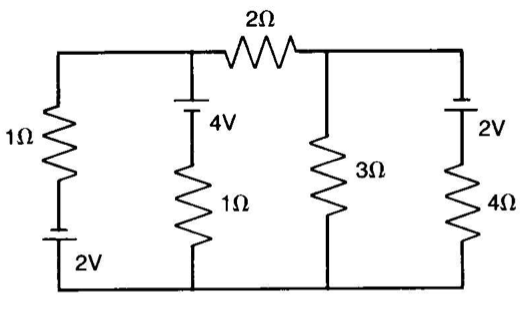

### Exercice 4

A l'aide des lois de Kirchhoff, déterminer le courant dans chaque branche du circuit suivant, et afficher proprement la puissance dissipée par la résistance de $9\Omega$ et la différence de potentiel aux bornes de la pile A. Utilisez la notation matricielle et résolvez le système numériquement.

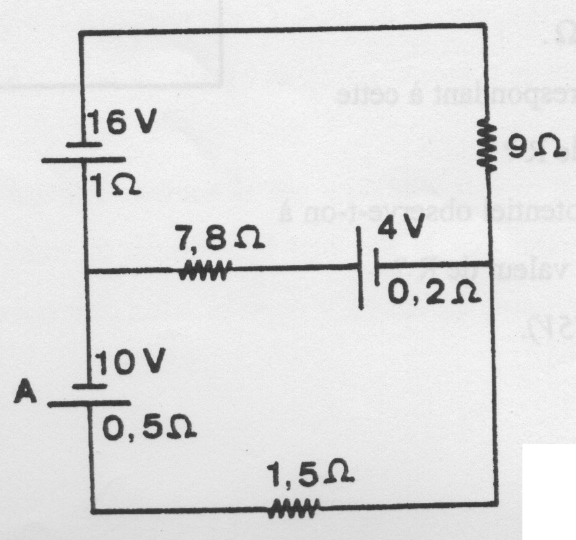

### Exercice 5

A l’aide des lois de Kirchhoff, déterminez les équations du courant. Indiquez préalablement sur le schéma ci-dessous votre choix pour les courants et leurs sens ainsi que les noeuds et mailles considérées. Utilisez la notation matricielle et résolvez le système à l'aide de Python. Affichez ensuite proprement la puissance dissipée par la résistance de $4\Omega$.

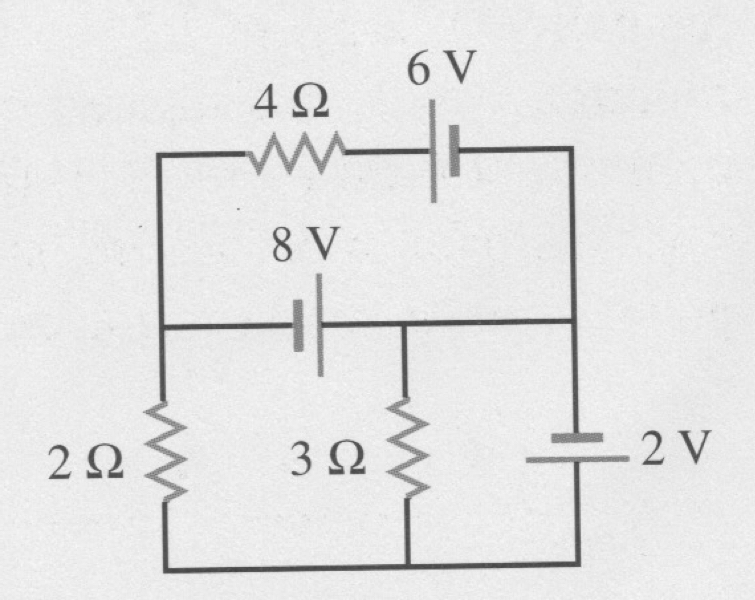

### Exercice 6

A l’aide des lois de Kirchhoff, déterminez les équations du courant. Indiquez préalablement sur le schéma ci-dessous votre choix pour les courants et leurs sens ainsi que les noeuds et mailles considérées. Utilisez la notation matricielle et résolvez le système à l'aide de Python. Affichez ensuite proprement la puissance dissipée par la résistance de $4\Omega$.

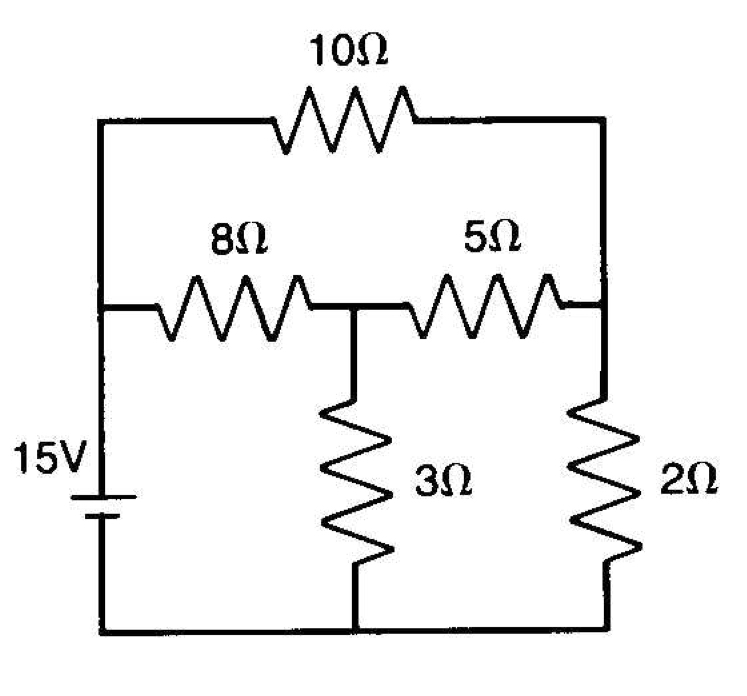

## 2.7 Valeurs propres et vecteurs propres : exercice résolu

Diagonalisez la matrice hermitienne suivante et affichez ses vecteurs propres. Vérifiez que l'équation aux valeurs propres est bien satisfaite.
\begin{equation*}
\left(
\begin{matrix}
1 & 3 & -3-2i & 4+5i\\
3 & 0 & 9+4i & 22 \\
-3+2i & 9-4i & -3 & 6\\
4-5i & 22 & 6 & 1
\end{matrix}
\right)
\end{equation*}

In [53]:
A=np.array([[1,3,-3-2j,4+5j],[3,0,9+4j,22],[-3+2j,9-4j,-3,6],[4-5j,22,6,1]])
print(A)

[[ 1.+0.j  3.+0.j -3.-2.j  4.+5.j]
 [ 3.+0.j  0.+0.j  9.+4.j 22.+0.j]
 [-3.+2.j  9.-4.j -3.+0.j  6.+0.j]
 [ 4.-5.j 22.+0.j  6.+0.j  1.+0.j]]


In [54]:
eigenvalues,eigenvectors=np.linalg.eig(A)

In [55]:
# Vecteur des valeurs propres de A :
print(eigenvalues)  # les VP sont réelles car A hermitienne

[ 27.39749166-1.39837205e-15j   3.58488421-1.56158519e-16j
  -9.05974243-3.00081538e-16j -22.92263343+1.85461211e-15j]


In [56]:
# Matrice des vecteurs propres normalisés (de même taille que A)
# 1 vecteur propre par colonne
# Le vecteur propre de la ième colonne correspond à la ième valeur propre du vectur eigenvalues
U=eigenvectors
print(U)

[[ 0.13356281+0.11419533j  0.85845223+0.j          0.28846421+0.34819761j
  -0.026595  +0.16437671j]
 [ 0.65711475+0.03132279j -0.05430222+0.09031747j -0.22224968+0.10939326j
   0.7033856 +0.j        ]
 [ 0.30817067-0.0796781j  -0.33977415+0.35466135j  0.77980064+0.j
  -0.10972633+0.1931895j ]
 [ 0.65956177+0.j          0.07757222-0.06859445j -0.26682153-0.23431228j
  -0.64924411-0.08149683j]]


In [57]:
# Construction de la matrice diagonale, avec les valeurs propres
D=np.diag(eigenvalues)    # matrice diagonale avec "eigenvalues" sur la diagonale
print(D)

[[ 27.39749166-1.39837205e-15j   0.        +0.00000000e+00j
    0.        +0.00000000e+00j   0.        +0.00000000e+00j]
 [  0.        +0.00000000e+00j   3.58488421-1.56158519e-16j
    0.        +0.00000000e+00j   0.        +0.00000000e+00j]
 [  0.        +0.00000000e+00j   0.        +0.00000000e+00j
   -9.05974243-3.00081538e-16j   0.        +0.00000000e+00j]
 [  0.        +0.00000000e+00j   0.        +0.00000000e+00j
    0.        +0.00000000e+00j -22.92263343+1.85461211e-15j]]


In [58]:
# Vérification de l'équation aux VP Ax=lambda*x (ici x = une colonne de U et lambda = un élément de eigenvalues)
# Vérification pour la première VP (indice 0) :
x=U[:,0]    # première colonne de U
lamb=eigenvalues[0]
print(A@x)   
print(lamb*x)    # lambda*x

[ 3.65928593+3.12866549e+00j 18.00329585+8.58165800e-01j
  8.44310343-2.18297998e+00j 18.07033815-1.45439216e-14j]
[ 3.65928593+3.12866549e+00j 18.00329585+8.58165800e-01j
  8.44310343-2.18297998e+00j 18.07033815-9.22312748e-16j]


In [59]:
# Vérification pour la deuxième VP (indice 1) :
x=U[:,1]    # deuxième colonne de U
lamb=eigenvalues[1]
print(A@x)
print(lamb*x)

[ 3.07745184+1.11022302e-16j -0.19466717+3.23777677e-01j
 -1.21805099+1.27141986e+00j  0.27808743-2.45903150e-01j]
[ 3.07745184-1.34054629e-16j -0.19466717+3.23777677e-01j
 -1.21805099+1.27141986e+00j  0.27808743-2.45903150e-01j]


In [60]:
# Vérifier l'équation Ustar@A@U = D
Ustar=np.transpose(np.conjugate(U))
print(Ustar@A@U)
print(D)

[[ 2.73974917e+01+1.11022302e-16j -4.99600361e-15+4.44089210e-16j
  -6.88338275e-15+1.66533454e-15j  1.24900090e-16-9.21485110e-15j]
 [-5.30131494e-15-1.66533454e-16j  3.58488421e+00-1.66533454e-16j
   9.29811783e-16-2.22044605e-16j  1.16573418e-15+2.55351296e-15j]
 [-6.16173779e-15-2.77555756e-15j  1.91513472e-15-4.44089210e-16j
  -9.05974243e+00+0.00000000e+00j -8.32667268e-15+6.43929354e-15j]
 [ 8.04911693e-16+8.77076189e-15j  6.66133815e-16-2.88657986e-15j
  -7.54951657e-15-6.21724894e-15j -2.29226334e+01-2.22044605e-16j]]
[[ 27.39749166-1.39837205e-15j   0.        +0.00000000e+00j
    0.        +0.00000000e+00j   0.        +0.00000000e+00j]
 [  0.        +0.00000000e+00j   3.58488421-1.56158519e-16j
    0.        +0.00000000e+00j   0.        +0.00000000e+00j]
 [  0.        +0.00000000e+00j   0.        +0.00000000e+00j
   -9.05974243-3.00081538e-16j   0.        +0.00000000e+00j]
 [  0.        +0.00000000e+00j   0.        +0.00000000e+00j
    0.        +0.00000000e+00j -22.92263343+

In [61]:
# Vérifier l'équation U@D@Ustar=A
print(U@D@Ustar)
print(A)

[[ 1.00000000e+00-1.03620261e-17j  3.00000000e+00+6.66133815e-15j
  -3.00000000e+00-2.00000000e+00j  4.00000000e+00+5.00000000e+00j]
 [ 3.00000000e+00-7.10542736e-15j -1.42108547e-14+2.75631568e-16j
   9.00000000e+00+4.00000000e+00j  2.20000000e+01-5.77315973e-15j]
 [-3.00000000e+00+2.00000000e+00j  9.00000000e+00-4.00000000e+00j
  -3.00000000e+00-2.60964122e-16j  6.00000000e+00-8.43769499e-15j]
 [ 4.00000000e+00-5.00000000e+00j  2.20000000e+01+3.33066907e-15j
   6.00000000e+00+7.54951657e-15j  1.00000000e+00+2.08002558e-16j]]
[[ 1.+0.j  3.+0.j -3.-2.j  4.+5.j]
 [ 3.+0.j  0.+0.j  9.+4.j 22.+0.j]
 [-3.+2.j  9.-4.j -3.+0.j  6.+0.j]
 [ 4.-5.j 22.+0.j  6.+0.j  1.+0.j]]


In [62]:
# Vérifions que U est bien unitaire : U@Ustar=Identité
print(U@Ustar) 

[[ 1.00000000e+00-4.93247390e-18j  1.94289029e-16+1.38777878e-16j
  -1.11022302e-16-5.55111512e-17j  1.52655666e-16+1.66533454e-16j]
 [ 1.94289029e-16-1.52655666e-16j  1.00000000e+00-3.67808877e-19j
   5.55111512e-17+3.33066907e-16j -3.88578059e-16-6.80011603e-16j]
 [-1.11022302e-16+5.55111512e-17j  5.55111512e-17-3.33066907e-16j
   1.00000000e+00+1.35275592e-18j -1.31838984e-16+1.38777878e-16j]
 [ 1.52655666e-16-1.66533454e-16j -3.88578059e-16+6.80011603e-16j
  -1.31838984e-16-1.66533454e-16j  1.00000000e+00-2.27537407e-18j]]
